In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
data_dict = pd.read_csv('../data/data_dictionary.csv')

In [64]:
train.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [29]:
data_dict[data_dict['Field'] == 'PCIAT-PCIAT_Total']['Value Labels'].iloc[0]

'Severity Impairment Index: 0-30=None; 31-49=Mild; 50-79=Moderate; 80-100=Severe'

In [25]:
pciat = train[train.columns[train.columns.str.startswith('PCIAT-PCIAT')]]
sii = train['sii']

In [42]:
pciat_max = pciat.drop('PCIAT-PCIAT_Total', axis=1).fillna(5).sum(axis=1)
pciat_min = pciat.drop('PCIAT-PCIAT_Total', axis=1).fillna(0).sum(axis=1)

train['pciat_max'] = pciat_max
train['pciat_min'] = pciat_min

In [43]:
def get_interval_index(pciat_max_val, pciat_min_val):
    intervals = [(0, 30), (31, 49), (50, 79), (80, 100)]
    for i, (low, high) in enumerate(intervals):
        if low <= pciat_max_val <= high and low <= pciat_min_val <= high:
            return i
    return None

sii_corrected = train.apply(lambda row: get_interval_index(row['pciat_max'], row['pciat_min']), axis=1)

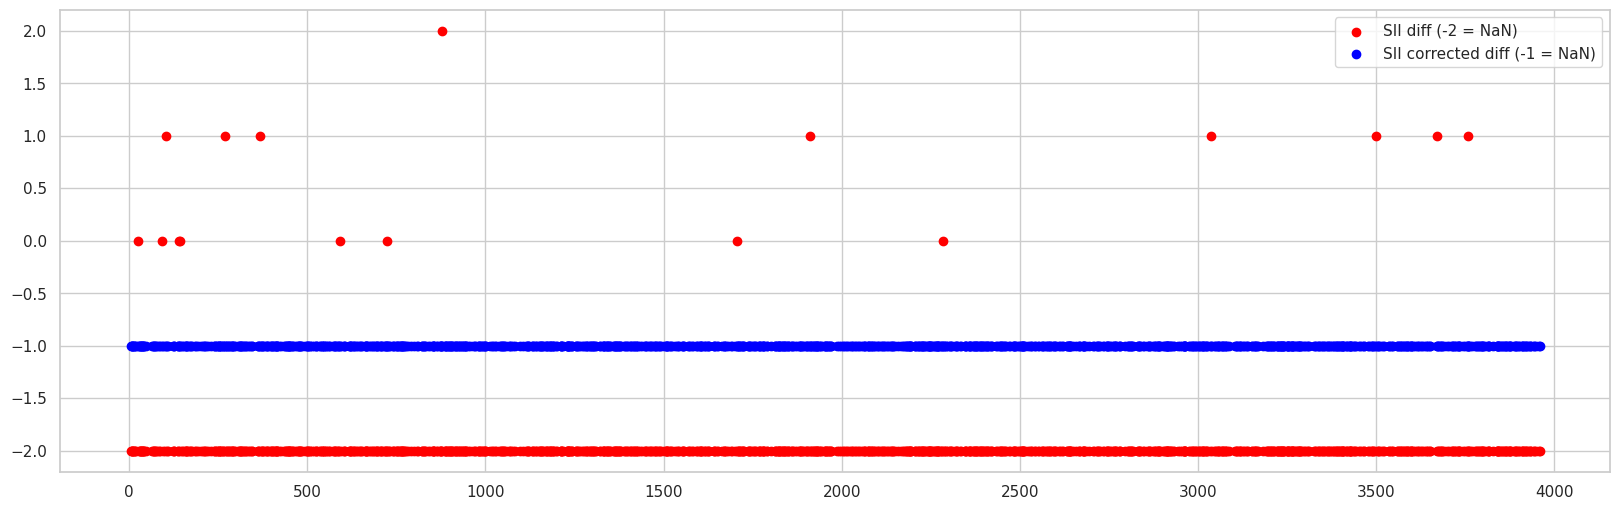

In [59]:
plt.figure(figsize=(20, 6))
diff_indices = sii[sii != sii_corrected].index
plt.scatter(diff_indices, sii[diff_indices].fillna(-2), color='red', label='SII diff (-2 = NaN)')
plt.scatter(diff_indices, sii_corrected[diff_indices].fillna(-1), color='blue', label='SII corrected diff (-1 = NaN)')
plt.legend()
plt.show()

In [62]:
pciat_max[diff_indices].value_counts()

100.0    1225
31.0        3
50.0        2
53.0        2
52.0        2
35.0        1
56.0        1
34.0        1
83.0        1
37.0        1
55.0        1
54.0        1
Name: count, dtype: int64

In [63]:
pciat_min[diff_indices].value_counts()

0.0     1226
45.0       2
26.0       2
30.0       1
48.0       1
31.0       1
21.0       1
29.0       1
78.0       1
38.0       1
27.0       1
47.0       1
49.0       1
42.0       1
Name: count, dtype: int64

Most of the NaNs of the siis are points where they did not respond to the PICAT questions.